In [5]:
cd "D:\AppliedAI\"

D:\AppliedAI


<p style = "background : orange" >Importing packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

<p style = "background : orange"> loading the dataset and peeking into it

Haberman's Survival : Exploratory Data Analysis
Haberman's Cancer survival :EDA

Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
Age of patient at the time of operation (numerical) <br>
Patient's year of operation (year - 1900, numerical) <br>
Number of positive axillary nodes detected (numerical) <br>
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

# Goal is to find the chances of survival for more than 5 years after treatment
# Age group, gender,etc. which are likely to die early after treatment

In [7]:
data = pd.read_csv("haberman.csv")                      # Uploading .csv file
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
data.info()                                             # checking for number of examples, null values and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
data.columns                                          

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [10]:
data.values

array([[30, 64,  1,  1],
       [30, 62,  3,  1],
       [30, 65,  0,  1],
       ...,
       [77, 65,  3,  1],
       [78, 65,  1,  2],
       [83, 58,  2,  2]], dtype=int64)

In [11]:
data.describe()                                         # basic stats

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<p style =" background : pink"> Observations <br> median age of patients is 52 years <br> 75% of the patients have nodes <=4.

<p style = "background : orange"> peeking into number of years survived

In [12]:
x = data["status"]                                 # total number of survivors
y = data[data["status"]==2]["status"]              # total number of survivors who died within 5 years of operation

print("total number of survivors are {}".format(len(x)))
print("total number of surviors died within 5 years of operation are {}".format(len(y)))  
print("the percentage of people who live for more than 5 years is {}".format((306-81)/306))

total number of survivors are 306
total number of surviors died within 5 years of operation are 81
the percentage of people who live for more than 5 years is 0.7352941176470589


# 2D plots

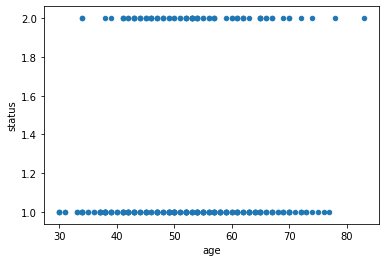

In [13]:
data.plot(kind='scatter', x='age', y='status') ;
plt.show()

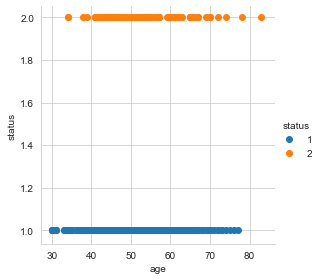

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="status", size=4) \
   .map(plt.scatter, "age", "status") \
   .add_legend();
plt.show();

<p style = "background : pink">
Obersvations : <br>
1. On a positive note, we can say, survivors whose age is below 40 are likely to survive for more than 5 years <br>
<br>
let us calulate the percentage of patients who can survive for more than 5 years having age<40

In [27]:
a=data[(data["status"]==1) & (data["age"]<=40)]["status"].sum()         # finding the number of patients with age<40 and survived for more than 5 years
b=data[(data["status"]==2) & (data["age"]<=40)]["status"].sum()         # finding the number of patients with age<40 and survived for less than 5 years
print(a)
print(b)
print(a/(a+b))                                                          # calculating perrcentage

39
8
0.8297872340425532


# Pair Plots

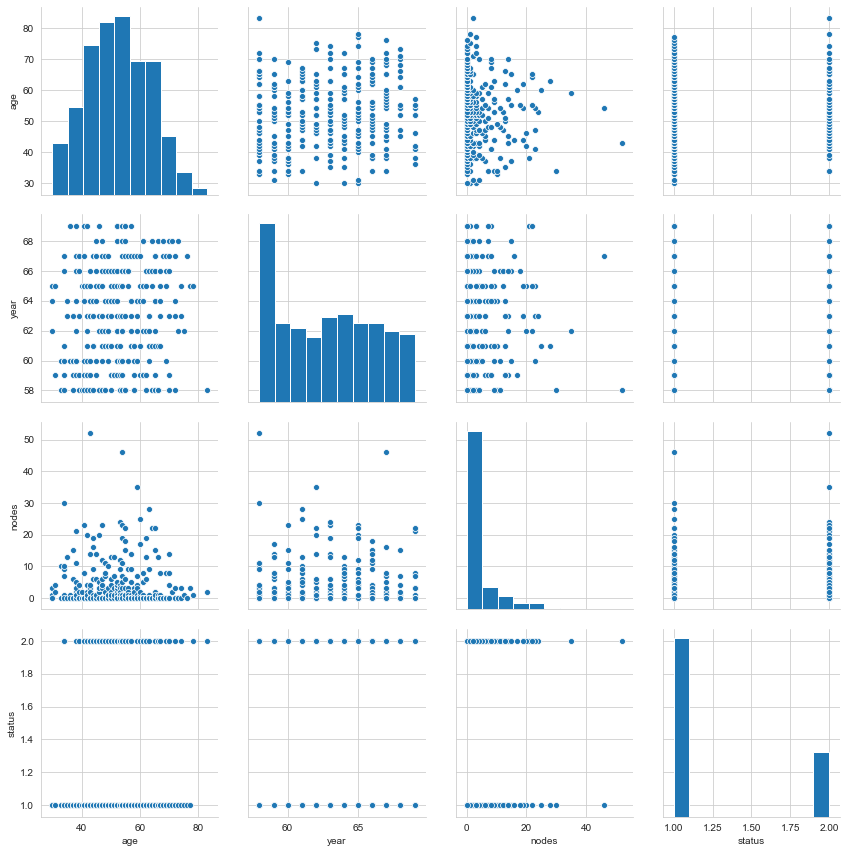

In [28]:
sns.set_style("whitegrid");                           # alltogether without 'hue on status'
sns.pairplot(data, size=3);
plt.show()

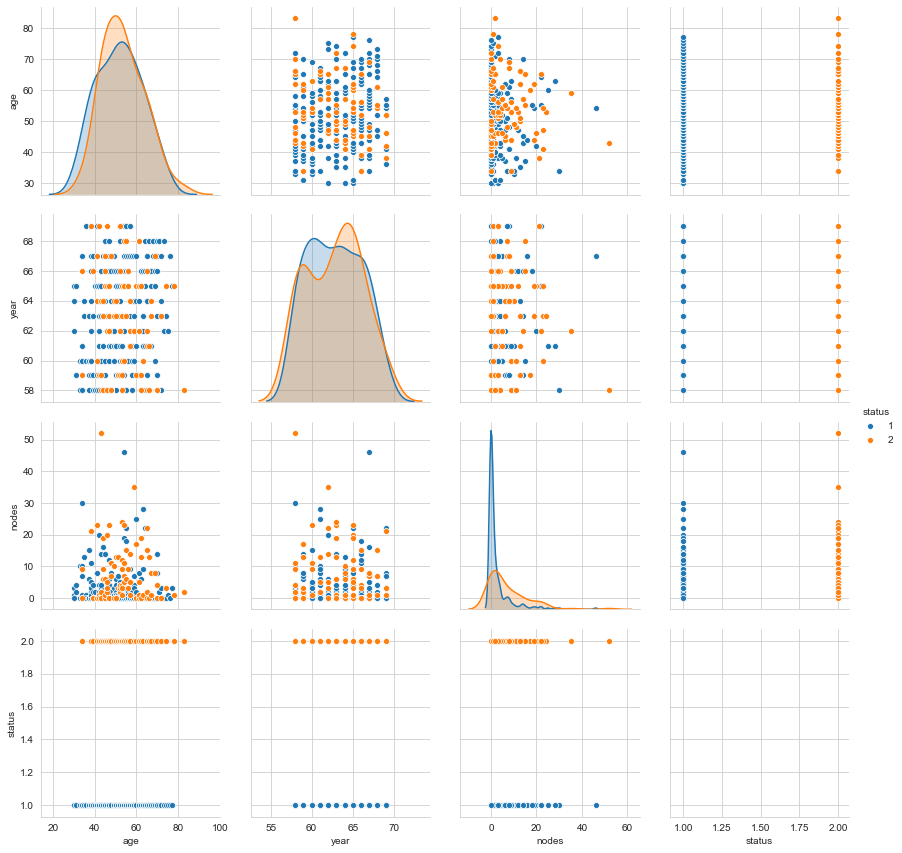

In [29]:
sns.set_style("whitegrid");                                   # with 'hue on status'
sns.pairplot(data, hue = "status", size=3);
plt.show()

# Histogram

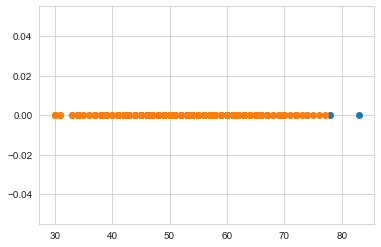

In [30]:
data_below5years = data.loc[data["status"] == 2];
data_above5years = data.loc[data["status"] == 1];
#print(iris_setosa["petal_length"])
plt.plot(data_below5years["age"], np.zeros_like(data_below5years["age"]), 'o')
plt.plot(data_above5years["age"], np.zeros_like(data_above5years["age"]), 'o')
plt.show()

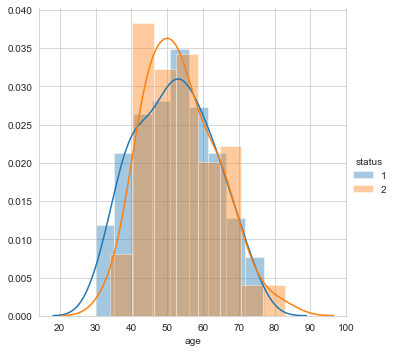

In [31]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

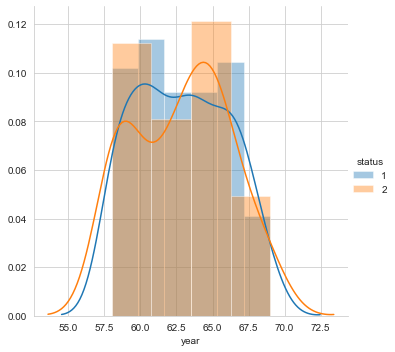

In [32]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

# Box plot and Whiskers

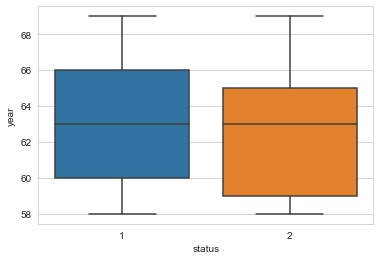

In [33]:
sns.boxplot(x='status',y='year', data=data)
plt.show()

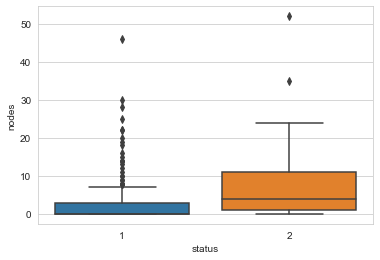

In [34]:
sns.boxplot(x='status',y='nodes', data=data)
plt.show()

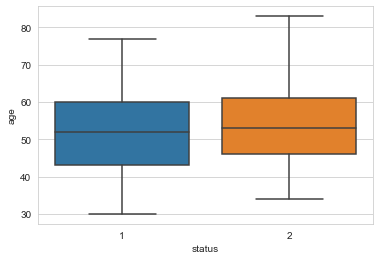

In [35]:
sns.boxplot(x='status',y='age', data=data)
plt.show()

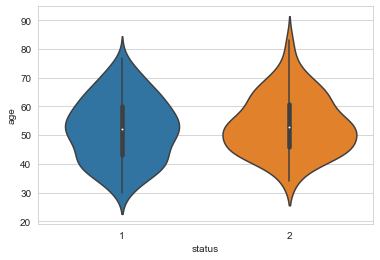

In [36]:
sns.violinplot(x="status", y="age", data=data, size=8)
plt.show()